In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [6]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [7]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [8]:
X= data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [9]:
%%time
model = DecisionTreeClassifier()
print('DecisionTreeClassifier accuracy',  cross_val_score(model, X, y, cv=10,scoring = 'accuracy').mean())

DecisionTreeClassifier accuracy 0.47279874213836476
CPU times: user 162 ms, sys: 0 ns, total: 162 ms
Wall time: 166 ms


In [10]:
%%time
model = BaggingClassifier(n_estimators=100)
print('BaggingClassifier accuracy',  cross_val_score(model, X, y, cv=10,scoring = 'accuracy').mean())

BaggingClassifier accuracy 0.5553459119496855
CPU times: user 8.59 s, sys: 23.3 ms, total: 8.62 s
Wall time: 8.61 s


In [12]:
%%time
model = RandomForestClassifier(n_estimators=100)
print('RandomForestClassifier accuracy',  cross_val_score(model, X, y, cv=10,scoring = 'accuracy').mean())

RandomForestClassifier accuracy 0.5672248427672956
CPU times: user 3.85 s, sys: 26.7 ms, total: 3.88 s
Wall time: 4.35 s


RandomForestClassifier показал лучший результат Accuracy с количеством estimators=100

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                                    , random_state=123)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.


In [9]:
%%time
tree = [10, 50, 100] +  list(np.linspace(200,5000,25).astype('int'))

results = {}
for est in tree:
    model = RandomForestClassifier(n_estimators=est, random_state=123, n_jobs=-1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[est] = accuracy_score(y_test, y_pred)
results

CPU times: user 4min 48s, sys: 24 s, total: 5min 12s
Wall time: 3min 33s


In [43]:
b = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy']).reset_index()
b

,index,accuracy
0,10,0.662500
1,50,0.658333
2,100,0.650000
3,200,0.662500
4,400,0.666667
5,600,0.658333
6,800,0.654167
7,1000,0.656250
8,1200,0.658333
9,1400,0.660417


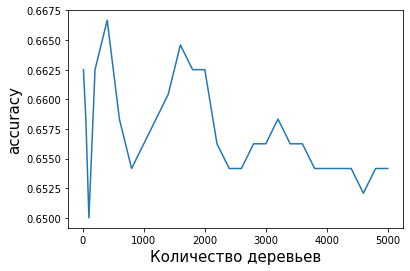

In [45]:
plt.plot(b['index'],b['accuracy'])
plt.xlabel('Количество деревьев', size=15)
plt.ylabel('accuracy', size=15)
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(X_train, y_train)
print('accuracy',  cross_val_score(model, X_test, y_test, cv=10,scoring = 'accuracy').mean())

accuracy 0.5708333333333334


In [16]:
from xgboost import XGBClassifier
clf = XGBClassifier(verbosity=0).fit(X_train, y_train)
print ('accuracy', cross_val_score(clf, X_test,y_test,cv=10,scoring = 'accuracy').mean())

accuracy 0.6104166666666667


С параметрами по умолчанию XGBClassifier показал результат лучше чем GradientBoostingClassifier

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [17]:
param_dist = {
        'n_estimators':range(10,40,5),
        'max_depth':range(2,6,1),
        'learning_rate':np.linspace(0.01,2,10),
        }

In [18]:
%%time
model_gb = GradientBoostingClassifier()
grid = GridSearchCV(model_gb, param_dist, scoring='accuracy', n_jobs=-1, cv=3)
fit_model = grid.fit(X_train, y_train)
print("Accuracy:", fit_model.score(X_test, y_test))
print(grid.best_params_)

Accuracy: 0.6
{'learning_rate': 0.45222222222222225, 'max_depth': 3, 'n_estimators': 30}
CPU times: user 5.19 s, sys: 247 ms, total: 5.44 s
Wall time: 3min 21s


In [19]:
%%time
model_XGB = XGBClassifier(verbosity=0)
grid = GridSearchCV(model_XGB, param_dist, scoring='accuracy', n_jobs=-1, cv=3)
fit_model = grid.fit(X_train, y_train)
print("Accuracy:", fit_model.score(X_test, y_test))
print(grid.best_params_)

Accuracy: 0.65
{'learning_rate': 0.8944444444444445, 'max_depth': 5, 'n_estimators': 35}
CPU times: user 2.65 s, sys: 85.3 ms, total: 2.73 s
Wall time: 52 s


XGBClassifier дал лучше результат метрики Accuracy чем GradientBoostingClassifier

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [23]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 124 kB/s 


In [24]:
%%time
from catboost import CatBoostClassifier
model_catbust = CatBoostClassifier( verbose=0).fit(X_train, y_train)
print('accuracy',  cross_val_score(model_catbust, X_test, y_test, cv=10,scoring = 'accuracy').mean())

accuracy 0.5999999999999999
CPU times: user 1min 35s, sys: 3.22 s, total: 1min 38s
Wall time: 52.7 s


In [25]:
%%time
from lightgbm import LGBMClassifier
model_lgb = LGBMClassifier().fit(X_train, y_train)
print('accuracy',  cross_val_score(model_lgb, X_test, y_test, cv=10,scoring = 'accuracy').mean())

accuracy 0.5958333333333334
CPU times: user 2.37 s, sys: 171 ms, total: 2.54 s
Wall time: 2.57 s


LGBMClassifier, CatBoostClassifier, XGBClassifier, GradientBoostingClassifier с параметрами по умолчанию показали примерно одинаковые значения метрики accuracy = 0,57-0,61

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [26]:
%%time
grid = GridSearchCV(model_catbust, param_dist, scoring='accuracy', n_jobs=-1, cv=3)
fit_model = grid.fit(X_train, y_train)
print("CatBoostClassifier Accuracy:", fit_model.score(X_test, y_test))
print(grid.best_params_)

CatBoostClassifier Accuracy: 0.5979166666666667
{'learning_rate': 0.23111111111111113, 'max_depth': 5, 'n_estimators': 35}
CPU times: user 2.63 s, sys: 124 ms, total: 2.75 s
Wall time: 60 s


In [27]:
%%time
grid = GridSearchCV(model_lgb, param_dist, scoring='accuracy', n_jobs=-1, cv=3)
fit_model = grid.fit(X_train, y_train)
print("LGBMClassifier Accuracy:", fit_model.score(X_test, y_test))
print(grid.best_params_)

LGBMClassifier Accuracy: 0.6270833333333333
{'learning_rate': 0.23111111111111113, 'max_depth': 5, 'n_estimators': 30}
CPU times: user 1.65 s, sys: 66.4 ms, total: 1.72 s
Wall time: 20.5 s


При подборе оптимальных параметров методом GridSearchCV лучший показатель Accuracy показал 
XGBClassifier (Accuracy=0,65)

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [29]:
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials, hp
import xgboost as xgb

xgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'n_estimators':     hp.choice('n_estimators',    np.arange(5, 30))
}

xgb_fit_params = {
    'eval_metric': 'mlogloss',
    'verbose': False
}
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred:1 - accuracy_score(y, pred)

class HPOpt(object):

    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test  = X_test
        self.y_train = y_train
        self.y_test  = y_test
        self.result = 0

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            self.result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return self.result, trials

    def xgb_reg(self, para):
        reg =XGBClassifier(**para['reg_params'])
        return self.train_reg(reg, para)


    def train_reg(self, reg, para):
        eval_set = [(self.X_train, self.y_train), (self.X_test, self.y_test)]
        reg.fit(self.X_train, self.y_train, eval_set=eval_set, **para['fit_params'])
        pred = reg.predict(self.X_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}
    
    def return_result(self):
        return self.result

In [30]:
obj = HPOpt(X_train, X_test, y_train, y_test)
xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=500)

100%|██████████| 500/500 [02:25<00:00,  3.43it/s, best loss: 0.3354166666666667]


In [47]:
print(obj.return_result())

{'learning_rate': 3, 'max_depth': 10, 'n_estimators': 24}


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [31]:

from sklearn.ensemble import StackingClassifier

estimators = [
    ('GBC', GradientBoostingClassifier()),
    ('XGB', XGBClassifier()),
    ('CatBoost', CatBoostClassifier()),
    ('LGBMClassifier', LGBMClassifier())

]
stacking = StackingClassifier(estimators=estimators, cv=3, n_jobs=-1)
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6604166666666667


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [32]:
estimators_tuned = [
    ('GBC', GradientBoostingClassifier(
        learning_rate=0.45,
        max_depth=3,
        n_estimators=30)
    ),
    ('XGB', XGBClassifier(
        learning_rate=0.89,
        max_depth=5,
        n_estimators=35)
    ),
    ('CatBoost', CatBoostClassifier(
        learning_rate=0.23,
        max_depth=5,
        n_estimators=35)
    ),
    ('LGBMClassifier', LGBMClassifier(
        learning_rate=0.23,
        max_depth=5,
        n_estimators=30)
     )
]
stacking_tuned = StackingClassifier(estimators=estimators_tuned, cv=3, n_jobs=-1)
stacking_tuned.fit(X_train, y_train)
y_pred_tuned = stacking_tuned.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

Accuracy: 0.6625


Стэкинг 4-х алгоритмов с оптимальными параметрами градиентного бустинга дает такое же значение метрики Accuracy как и с базовыми параметрами градиентного бустинга. С подбором параметров алгоритм работает дольше, значит в нашей задаче эффективнее использовать алгоритмы с базовыми параметрами.